# ***Describing Probability Distributions***

In [6]:
# Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
# Load data:

df = pd.read_csv('C:\\Users\jnate\\OneDrive\\Documents\\Data Enrichment\\data-enrichment-wk15\\Probability-Density-Functions\\data.csv')

df.head(5)

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


1. Plot a histogram with a kde (kernel density estimate)

## The features to analyze: 
1. VitD_levels
2. Doc_visits
3. TotalCharge

### For Each Feature:

1. Plot a histogram with a kde (kernel density estimate)
2. Add a line for the mean (red)
3. Add a line for the median (green)
4. Add a line for for +1 std from the mean (black)
5. Add a line for the - 1 std from the mean (black)
6. Highlight the range between +1 and =1 std (yellow)

In [4]:
# Check for missing values:

df.isna().sum()

State                 5
Lat                   0
Lng                   0
Area                  5
Children              7
Age                   0
Income                0
Marital               5
Gender                5
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         5
HighBlood             0
Stroke                0
Complication_risk     5
Overweight            0
Arthritis             6
Diabetes              6
Hyperlipidemia        2
BackPain              8
Anxiety               2
Allergic_rhinitis     6
Reflux_esophagitis    0
Asthma                0
Services              5
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

In [5]:
# Check column data types:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [8]:
# Features to Analyze

vl = df['VitD_levels']

dc = df['Doc_visits']

tc = df['TotalCharge']

## ***Vit Levels***

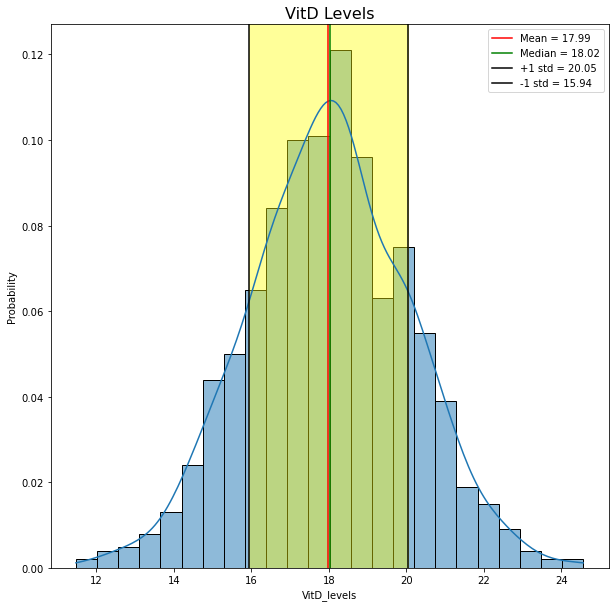

In [35]:
# Variable list:

vlmean = vl.mean()
vlmed = vl.median()
std = vl.std()
vlplus = vlmean + std
vlminus = vlmean - std

# 1. Plot a histogram of probabilities for the first feature:
fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(10,10));
ax = sns.histplot(x=vl,stat='probability',kde=True)

# 2. Add a line for the mean (red)
ax.axvline(vlmean, color='red', label =f'Mean = {vlmean:,.2f}')

# 3. Add a line for the median (green)
ax.axvline(vlmed, color='green', label =f'Median = {vlmed:,.2f}')

# 4. Add a line for for +1 std from the mean (black)
ax.axvline(vlplus, color='k', label =f'+1 std = {vlplus:,.2f}')

# 5. Add a line for the - 1 std from the mean (black)
ax.axvline(vlminus, color='k', label =f'-1 std = {vlminus:,.2f}')

# 6. Highlight the range between +1 and =1 std (yellow)
ax.axvspan(vlplus, vlminus, color = 'yellow', alpha = .4)

ax.set_title("VitD Levels", fontsize =16);
ax.legend();

In [33]:
from scipy import stats

# Kurtosis Value:

vlkurt = stats.kurtosis(vl, fisher = False)

vlkurt

3.013147515833447

### Answer the following questions:

1. Is it Discrete or Continuous?
    
    ***A: This distribution is continuous.***
    
    
2. Does it have a skew? If so, which direction (+/-)
What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    
    ***A: There is a subtle negative skew: mean < median < mode. This distribution is Mesokurti; the majority of values are clustered in the middle of the distribution.*** 

## ***Doctor Visits***

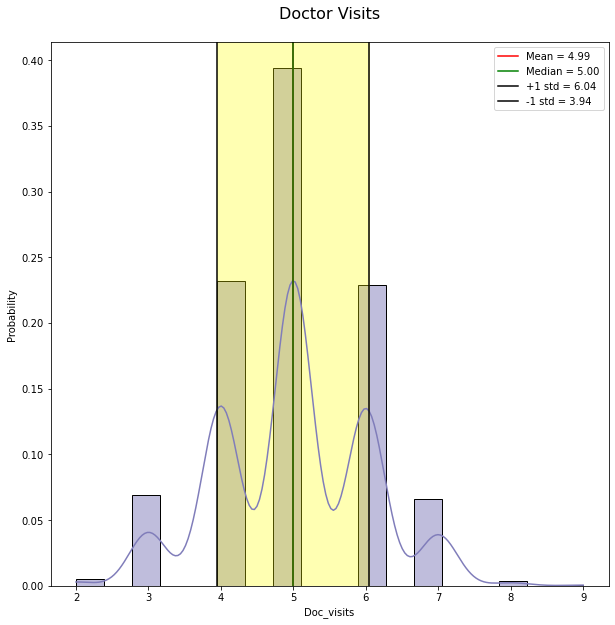

In [36]:
# Variable list:

dcmean = dc.mean()
dcmed = dc.median()
dcstd = dc.std()
dcplus = dcmean + dcstd
dcminus = dcmean - dcstd

# 1. Plot a histogram of probabilities for the second feature:
fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(10,10));
ax = sns.histplot(x=dc,stat='probability',kde=True, color = '#807dba')

# 2. Add a line for the mean (red)
ax.axvline(dcmean, color='red', label =f'Mean = {dcmean:,.2f}')

# 3. Add a line for the median (green)
ax.axvline(dcmed, color='green', label =f'Median = {dcmed:,.2f}')

# 4. Add a line for for +1 std from the mean (black)
ax.axvline(dcplus, color='k', label =f'+1 std = {dcplus:,.2f}')

# 5. Add a line for the - 1 std from the mean (black)
ax.axvline(dcminus, color='k', label =f'-1 std = {dcminus:,.2f}')

# 6. Highlight the range between +1 and =1 std (yellow)
ax.axvspan(dcplus, dcminus, color = 'yellow', alpha = .3)

ax.set_title("Doctor Visits\n", fontsize =16);
ax.legend();

In [37]:
# Kurtosis Value:

dckurt = stats.kurtosis(dc, fisher = False)

dckurt

2.9919958083381206

### Answer the following questions:

1. Is it Discrete or Continuous?
    
    ***A: This distribution is discrete.***
    
    
2. Does it have a skew? If so, which direction (+/-)
What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    
    ***A: There is little to no skew, the mean, median and mode are equal. This distribution could be considered Mesokurtic or Platykurtic since the kurtosis vlaue is just below 3.*** 

## ***Total Charge***

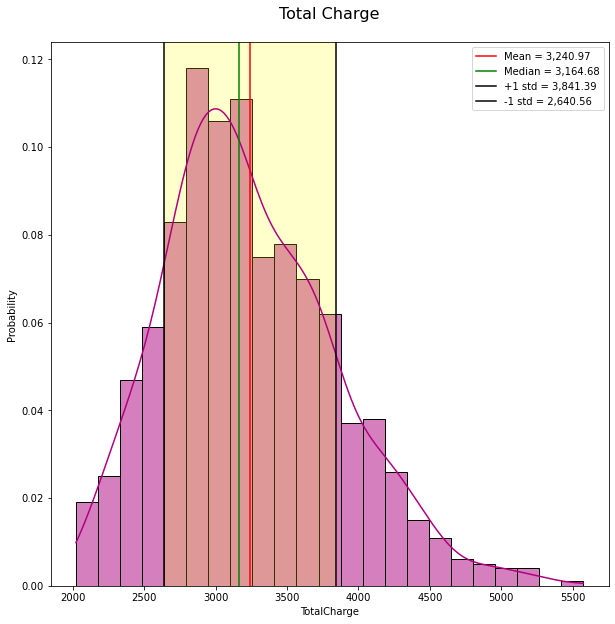

In [39]:
# Variable list:

tcmean = tc.mean()
tcmed = tc.median()
tcstd = tc.std()
tcplus = tcmean + tcstd
tcminus = tcmean - tcstd

# 1. Plot a histogram of probabilities for the second feature:
fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(10,10));
ax = sns.histplot(x=tc,stat='probability',kde=True, color = '#ae017e')

# 2. Add a line for the mean (red)
ax.axvline(tcmean, color='red', label =f'Mean = {tcmean:,.2f}')

# 3. Add a line for the median (green)
ax.axvline(tcmed, color='green', label =f'Median = {tcmed:,.2f}')

# 4. Add a line for for +1 std from the mean (black)
ax.axvline(tcplus, color='k', label =f'+1 std = {tcplus:,.2f}')

# 5. Add a line for the - 1 std from the mean (black)
ax.axvline(tcminus, color='k', label =f'-1 std = {tcminus:,.2f}')

# 6. Highlight the range between +1 and =1 std (yellow)
ax.axvspan(tcplus, tcminus, color = 'yellow', alpha = .2)

ax.set_title("Total Charge\n", fontsize =16);
ax.legend();

In [38]:
# Kurtosis Value:

tckurt = stats.kurtosis(tc, fisher = False)

tckurt

3.2650077463439384

### Answer the following questions:

1. Is it Discrete or Continuous?
    
    ***A: This distribution is continuous.***
    
    
2. Does it have a skew? If so, which direction (+/-)
What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    
    ***A: There is positive skew, the mode is larger than the median and mean. The mean is slightly larger than the median. This distribution is Leptokurtic - values are clustered in the peak of the distribution.*** 